# Principal Component Analysis of Height and Weight Data

Weight and height are strongly correlated. 

But men and women have different weights heights. 

In this exercise you will investigate what information PCA extracts. 

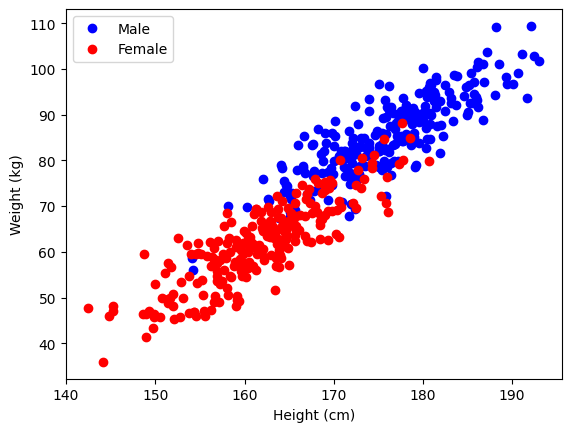

In [37]:
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib inline

df = pd.read_csv('weights-heights-metric.csv')

pl.plot(df.loc[df['Gender']=='Male', 'Height'], df.loc[df['Gender']=='Male', 'Weight'],'bo',
        df.loc[df['Gender']=='Female', 'Height'], df.loc[df['Gender']=='Female', 'Weight'],'ro')
pl.xlabel('Height (cm)')
pl.ylabel('Weight (kg)')
pl.legend(['Male','Female']);

# Assignment 1: 

Compute PCA on a data set of weight and height of men and women. 

Plot the principal components of the data.

Which variance is captured by each principal component? 

In [38]:
import numpy as np
import scipy as sp

def pca(X, ncomp=2):
    # subtract the mean
    mu = X.mean(axis=0)
    Xcentered = X - mu
    # compute covariance matrix
    C = np.cov(Xcentered, rowvar=False)
    # compute eigenvectors of covariance matrix
    V, U = np.linalg.eig(C)
    return (Xcentered @ U)


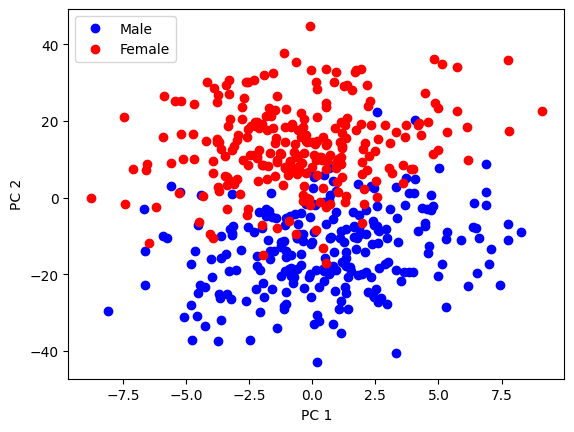

In [39]:
# perform PCA
X = df[['Height','Weight']]
Xpca = pca(X)

# plot data in PCA space
pl.plot(Xpca.loc[df['Gender']=='Male',0],Xpca.loc[df['Gender']=='Male',1],'bo',
        Xpca.loc[df['Gender']=='Female',0],Xpca.loc[df['Gender']=='Female',1],'ro')
pl.xlabel('PC 1')
pl.ylabel('PC 2')
pl.legend(['Male','Female'])

# Assignment 2: 

Compute the covariance matrix of the original data. 

Compute the covariance matrix of the data in the PCA space. 

Print the covariance of the first and second dimension of the original and the PCA space. 

In [40]:
C = np.cov(X, rowvar=False)
Cpca = np.cov(Xpca, rowvar=False)
print(f"Cov width/height: {C[0,1]}\nCov first PC/second PC {Cpca[0,1]}")

Cov width/height: 133.02270299323848
Cov first PC/second PC 4.784416016340554e-14
